# Homework Assignment 3 : Exploratory Data Analysis, Network Analysis & Regression

---
This assignment covers three modules:
> 1.  Exploratory Data Analysis
> 2.  Regression
> 3.  Network Analysis
---

We will be using the following datasets for this assignment:

1.  Cancer dataset for data exploration and regression tasks
2.  City Network for network analysis  

Import the necessary libraries.

In [2]:
#### TODO: Write your code here
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

%matplotlib inline

Import the `cancer_data` as a Pandas DataFrame. Discard its first two columns `id` and `diagnosis`.

Display the dataset.

In [5]:
#### TODO: Write your code here
data = pd.read_csv("CancerData.csv") # loading shooting data into a pandas object
data.drop('id', inplace=True, axis=1) # dropping city column 
data.drop('diagnosis', inplace=True, axis=1) # dropping state column 
data.head(n=10) #viewing only essential information

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


You are familiar with the cancer dataset. It has 10 different parameters. The `mean`, `standard error` and the `worst` values for each paraemeter is included in the dataset. Thus, the dataset has 30 features.   

# 1. Exploratory Data Analysis (EDA)

## 1.1 Univariate Study

### 1.1.1 Non-Graphical EDA

Compute the following for each feature (/column) and store them in a new DataFrame `metrics`.

> 1.  maximum
> 2.  minimum
> 3.  mean
> 4.  median
> 5.  standard deviation
> 6.  variance
> 7.  inter-quartile range
> 8.  skewness, and
> 9.  Kurtosis 

Show the `metrics` DataFrame.

In [6]:
#### TODO: Write your code here
metrics = {
    
    'max': np.max(data, axis=0),
    'min': np.min(data, axis=0),
    'mean': np.mean(data, axis=0),
    'median': np.median(data, axis=0),
    'std': np.std(data, axis=0),
    'var': np.var(data, axis=0),
    'inter_quartile_range': sp.stats.iqr(data, axis=0),
    'skewness': sp.stats.skew(data, axis=0),
    'kurtosis': sp.stats.kurtosis(data, axis=0),
     }
metrics = pd.DataFrame(data=metrics).T
#metrics.columns = skew_dataframe.columns
metrics

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
median,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
std,3.520951,4.297255,24.277619,351.604754,0.014052,0.052766,0.079650,0.038769,0.027390,0.007054,...,4.828993,6.140854,33.573002,568.856459,0.022812,0.157198,0.208441,0.065675,0.061813,0.018045
var,12.397094,18.466397,589.402799,123625.903080,0.000197,0.002784,0.006344,0.001503,0.000750,0.000050,...,23.319169,37.710092,1127.146434,323597.670893,0.000520,0.024711,0.043448,0.004313,0.003821,0.000326
inter_quartile_range,4.080000,5.630000,28.930000,362.400000,0.018930,0.065480,0.101140,0.053690,0.033800,0.008420,...,5.780000,8.640000,41.290000,568.700000,0.029400,0.191900,0.268400,0.096470,0.067500,0.020620
skewness,0.939893,0.648734,0.988037,1.641391,0.455120,1.186983,1.397483,1.168090,0.723695,1.301047,...,1.100205,0.497007,1.125188,1.854468,0.414330,1.469667,1.147202,0.491316,1.430145,1.658193
kurtosis,0.827584,0.741145,0.953165,3.609761,0.837945,1.625140,1.970592,1.046680,1.266117,2.969017,...,0.925288,0.211809,1.050243,4.347331,0.502760,3.002120,1.590568,-0.541367,4.395073,5.188111


### 1.1.2 Graphical EDA

#### 1.1.2.1 Box Plot

Create BoxPlots of the data. 

Create a different subplot for each variable. 

You MUST use a loop to create the subplots.

For each variable (like radius, perimeter, area...), keep their `mean`, `standard error` and `worst` values adjacent to each other.

In [4]:
#### TODO: Write your code here


#### 1.1.2.2 Histogram plot & KDE

Plot the histogram plots of each feature of the dataset. Show the Gaussian kernel density estimation curve on top of each feature.

Create a different subplot for each variable. 

You MUST use a loop to create the subplots.

For each parameter (like radius, perimeter, area...), keep their `mean`, `standard error` and `worst` values adjacent to each other in a row. Each parameter takes a new row.

The title of the subplot shall include the `skewness` and `kurtosis` values (upto 3 decimal places) in addition to the name of the variable being plotted in the subplot. For example: `<Variable name> : Skewness=<Skewness value>  Kurtosis =<Kurtosis value>`

In [5]:
#### TODO: Write your code here


Inference:

1. What is the values of skewness and kurtosis values of the `area_se` feature? How does they relate with their histogram (with KDE curve) plot generated previously.

2.  What is the values of skewness and kurtosis values of the `texture_worst` feature? How does they relate with their histogram (with KDE curve) plot generated previously.

3.  What is the kurtosis value if `concave_points_worst`? How different is it from the other features? What can you infer from this kurtosis value?


## 1.2 Multivariate study

### 1.2.1 Normalization

Use `MinMaxScaler` from the sklearn library to normalize the data.

Normalize the data to $[-1,1]$ when using the `MinMaxScaler`.

In [6]:
#### TODO: Write your code here


### 1.2.2 Graphical Data Analysis

#### 1.2.2.1 Box Plots

Create BoxPlots of the normalized data. 

You MUST use a loop to create the subplots.

For each variable (like radius, perimeter, area...), keep their `mean`, `standard error` and `worst` values next to each other.

In [7]:
#### TODO: Write your code here


Answer this:

If you want to compare different variables of the data using BoxPlots, which normalization seems better, `MinMaxScaler` or `StandardScaler`? Why?

If you are using histogram plots for comparing different variables, will the normalization affect the inference? Explain why.

`StandardScaler` refers to the normalization using the mean and standard deviation. See [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

#### 1.2.2.2 Heat map

Plot the heatmap of the `mean` values of the dataset. Ignore the `standard error` and `worst` values.

Use Pearson correlation.

In [8]:
#### TODO: Write your code here


Now that we have the mean values of ten variables, pick the variable which has the maximum positive, maximum negative and almost zero correlation. Consider it as the response variable. What is the response variable?

Consider the three variables having almost zero, minimum and maximum correlation as the factors. Which variables are the factors?


#### 1.2.2.3 Pairplots

Plot the pairwise plots of the selcted variables (factors and responses) using the `seaborn` library.

You have 3 factors and 1 response.

In [9]:
#### TODO: Write your code here


# 2. Regression

## 2.1 Linear Regression

### 2.1.1 Univariate

Define a function named `linear_regression_single` that accepts the `response` and a single feature from `factors` as input. It should return the weights, predictions and the mean squared error as the output.

If $X$ is the factor and $y$ is the response, then $Xw=y$ (ideally). 
$$\hat{y}=Xw$$
$$MSE = \frac{1}{n} \sum_{i=0}^n (\hat{y}-y)^2 $$ 

Use `sklearn.metrics.mean_squared_error` to compute the mean square error.

In [10]:
#### TODO: Write your code here


In [11]:
#### TODO: Write your code here


Create a plot with three scatter subplots, one for each factor. Show the line on each of them.

The titles of the subplots shall include the `mean square error` and the `Pearson correlation coefficient` between each factor and the response.

Is there any correlation between the pearson correlation coefficient and the slope of the curve? Explain.

In [12]:
#### TODO: Write your code here


In [13]:
#### TODO: Write your code here


### 2.1.2 Multivariate

Define a function named `linear_regression_multi` that accepts the `response` and `factors` as input. It should return the weights, predictions and the mean squared error as the output.

If $X$ is the factor and $y$ is the response, then $Xw=y$ (ideally). 
$$\hat{y}=Xw$$
$$MSE = \frac{1}{n} \sum_{i=0}^n (\hat{y}-y)^2 $$ 

Use `sklearn.metrics.mean_squared_error` to compute the mean square error.

In [14]:
#### TODO: Write your code here


Let's drop the column that has almost zero correlation with the response.
The primary reason is that we can't visualize the data if we have more than three variables. We have one response and three factors.

In [15]:
#### TODO: Write your code here


Estimate the weights, predicted values and the mean square error using the `linear_regression_multi` function.

In [16]:
#### TODO: Write your code here


Create a 3D scatter plot for the factors and responses. Show the line.

In [17]:
#### TODO: Write your code here


Did you normalize the data before using the multi-variable regression? 

Is it necessary to normalize the data before multivariable regression? What is the effect of normalizing or not normalizing?

## 2.2 Optimization

### 2.2.1 Multivariate

So far, we have used the matrix inversion method for linear regression.

Now, use the `fit` function shown during the in-class demo to use an optimization based approach for regression. 

Estimate the weights, predicted values and the mean square error of the optimization based approach.

Use a 3D scatter to plot the factors and the response. Show the estimated linear curve.

In [18]:
# Define the function to fit
def fit(X, y, w, learning_rate, iterations):
    # Get the size of given data
    m = len(X)
    
    # Initial variables to save intermediate fitting results
    cost_history = np.zeros(iterations)
    w_history = np.zeros((iterations, len(w)))
    
    for i in range(iterations):
        # Predict
        y_hat = np.dot(X, w)
        
        # Calculate the cost
        cost = 1 / (m) * np.linalg.norm(y_hat - y)
        
        # Calculate the gradient
        gradient = 2 / m * np.dot(X.T, y_hat - y)
        
        # Update w
        w -= learning_rate * gradient
        
        # Save the fitting result at the current step
        w_history[i, :] = w.T
        cost_history[i] = cost
    
    return w, w_history, cost_history

In [19]:
#### TODO: Write your code here estimating weights using the previous function


In [20]:
#### TODO: Write your code here 


In [21]:
#### TODO: Write your code here for plotting


## 2.3 Polynomial Regression

Use the `PolynomialFeatures` method from `sklearn.preprocessing` to generate the polynomial features of degree 2.

Matrix inversion is a computationally expensive process. Use the `lstsq` method from `numpy.linalg` to compute the weights for the polynomial regression.

Create a 3D scatter plot and show the polynomial curve on it.

In [22]:
#### TODO: Write your code here


In [23]:
#### TODO: Write your code here


In [24]:
#### TODO: Write your code here


# 3. Network Analysis

## 3.1 Graph Creation 

Let's work on the network shown during the lecture.

For a quick reference, it is included here as well.

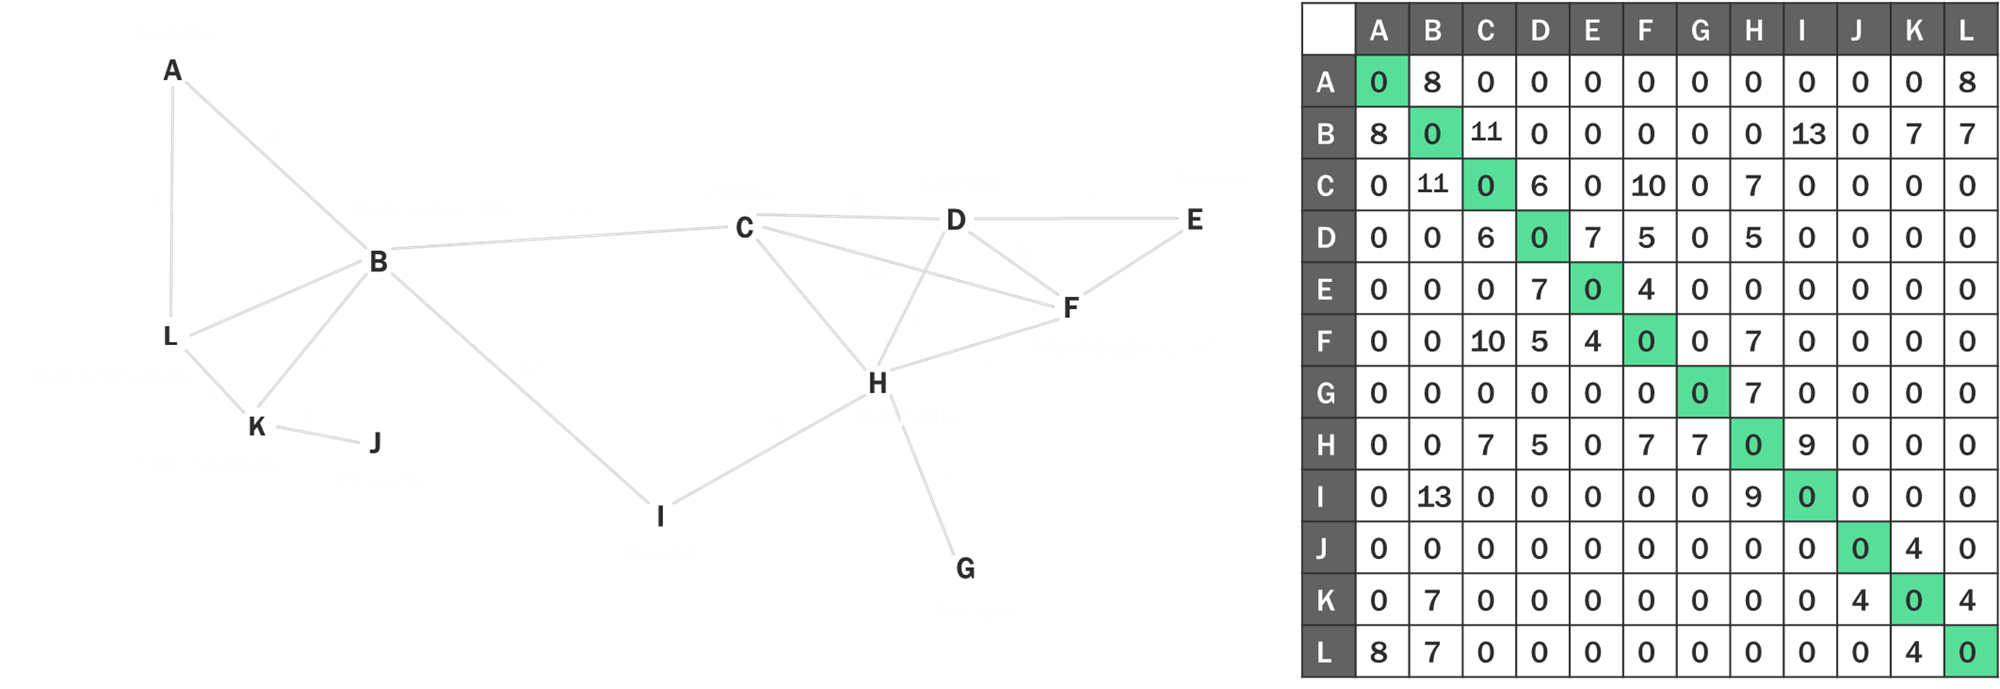

### 3.1.1 Adjacency list
Use the adjacency matrix between the nodes `[A, B, C, D, F, G, H, I, J, K]` to create the network. Note that this list has only 10 nodes. It excludes the nodes `E` and `L`.

Add the names of the nodes (`[A, B, C, D, F, G, H, I, J, K]`) to the network. 

Display the network.It should include the edge weights and node names.

In [25]:
#### TODO: Write your code here


In [26]:
#### TODO: Write your code here


In [27]:
#### TODO: Write your code here


### 3.1.2 NetworkX methods

Add the nodes `E` and `L` to the network you created. Add the links as well. Show the network.

In [28]:
#### TODO: Write your code here


Add a new node `M` to the network. It is connected to the nodes `C` and `I`. The length of the link from C to M is 5. The length of the link between I and M is 3.

In [29]:
#### TODO: Write your code here


## 3.2 Network Analysis

### 3.2.1 Radius and Diameter

Compute the `radius` and the `diameter` of the new network.

> Radius: It is the smallest shortest path using which we can reach all the nodes. For example, if B is the related node and the radius is 3, we can reach all the nodes in the network from B using at most 3 links. It means we need at least `radius` number of links to reach all the nodes in the network from the central node (B is the central node in this discussion).

> Diameter: It is the largest shortest path of the network. It means that the shortest path between any pair of nodes will always be less than the diameter. 


In [30]:
#### TODO: Write your code here for computing the radius


In [31]:
#### TODO: Write your code here for computing the diameter


### 3.2.2 Centralities

Compute the `degree centrality`, `eigenvector centrality` and the `closeness centrality` of the network.

Compute the unnormalized degree centrality as well.

In [32]:
#### TODO: Write your code here


In [33]:
#### TODO: Write your code here


In [34]:
#### TODO: Write your code here


In [35]:
#### TODO: Write your code here


###  3.2.3 Shortest Paths

Compute the shortest path of all the nodes from the node M using Dijkstra's algorithm.

In [36]:
#### TODO: Write your code here
